<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/Neural_digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y_act=Data["data"][:1000]/1000,Data["target"][:1000]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y_act,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y_act[position]) 

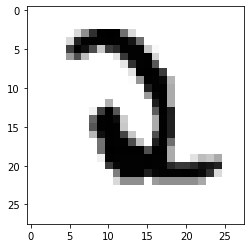

2


In [10]:
show_imag(X,y_act,400)

In [0]:
def convert_binary(y_act):
  y1=np.zeros((len(y_act),10))
  for i in range(len(y_act)):
    y1[i][int(y_act[i])]=1
    
    
  return y1

In [0]:
NumHLayers=1
NumHUnits=3

In [26]:
y=convert_binary(y_act)
m,n=np.shape(X)
p,s=np.shape(y)
X_with_bias=np.c_[np.ones((X.shape[0],1)),X]
hidden=np.ones((m,NumHUnits+1))
out=np.ones((p,s))
#ITheta=np.ones((n+1,NumHUnits))
ITheta=np.random.rand(n+1,NumHUnits)
#ETheta=np.ones((NumHUnits+1,s))
ETheta=np.random.rand(NumHUnits+1,s)
EGrad=np.ones((NumHUnits+1,s))
IGrad=np.ones((n+1,NumHUnits))
for i in range(2500):
  hidden[:,1:NumHUnits+1]=(1/(1+np.exp(-1*np.matmul(X_with_bias,ITheta))))
  out=(1/(1+np.exp(-1*np.matmul(hidden,ETheta))))
  EGrad=np.matmul(hidden.transpose(),2*(y-out)*out*(1-out))
  #HGrad=(ETheta*sum(2*(y-out)*out*(1-out)))[1:NumHUnits+1]
  HGrad=np.sum(np.matmul(ETheta[1:NumHUnits+1],(2*(y-out)*out*(1-out)).transpose()),axis=1)
  HTGrad=np.matmul(X_with_bias.transpose(),hidden[:,1:NumHUnits+1]*HGrad)
  #HTGrad=sum(hidden[:,1:NumHUnits+1]*(hidden[:,1:NumHUnits+1]*(1-hidden[:,1:NumHUnits+1])))*ITheta[1:n+1,:]
  cost=sum(sum((y-out)**2))
  ETheta=ETheta+EGrad*0.0001
  #ITheta=ITheta+HTGrad*0.0001
  if(i%500==0):
    print(cost,HGrad,out)

6910.1394989785485 [-479.74950284 -841.29548346 -892.75480611] [[0.78210543 0.87176659 0.94513642 ... 0.93992764 0.85609125 0.78208356]
 [0.78210551 0.87176679 0.94513649 ... 0.93992776 0.85609145 0.78208389]
 [0.78209959 0.87175578 0.94513041 ... 0.9399219  0.85608019 0.78207347]
 ...
 [0.7821055  0.87176678 0.94513649 ... 0.93992776 0.85609144 0.78208388]
 [0.78210443 0.87176517 0.94513583 ... 0.9399267  0.85608949 0.7820825 ]
 [0.7821052  0.87176624 0.94513625 ... 0.93992743 0.85609086 0.78208331]]
899.1704382083992 [2.59117991 1.98563243 2.11623278] [[0.09918726 0.11692128 0.10139845 ... 0.11801063 0.09055376 0.10192211]
 [0.0991871  0.1169212  0.10139829 ... 0.11801054 0.09055367 0.10192208]
 [0.09919711 0.11692817 0.10140691 ... 0.11802062 0.09056034 0.10192981]
 ...
 [0.0991871  0.1169212  0.1013983  ... 0.11801054 0.09055367 0.10192209]
 [0.09918818 0.11692186 0.10139954 ... 0.1180112  0.09055414 0.10192301]
 [0.09918752 0.11692146 0.10139872 ... 0.11801086 0.0905539  0.1019223